[View in Colaboratory](https://colab.research.google.com/github/raahatg21/Digit-Recognition-MNIST-Dataset-with-Keras/blob/master/MNIST_1.ipynb)

# MNIST Dataset: Digit Classification

**Simple Neural Network of Fully Connected Layers. Using Regularization, Dropout. 96% Accuary on Validation Set. 95.8% Accuracy on Test Set**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from keras.datasets import mnist
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
# Importing the MNIST data that comes preloaded with Keras

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
# Preprocessing the Data (Reshaping the images and making pixel values between 0 ans 1)

train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32')/255

test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32')/255

In [6]:
# Example of a label

train_labels[2]

4

In [0]:
# One Hot Encoding of Labels

train_labels = to_categorical(train_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [8]:
# Example of label after One-Hot Encoding

train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Validation Data (10,000 samples of Training Set)

val_data = train_data[:10000]
val_labels = train_labels[:10000]

partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

In [0]:
# Building the Model (Using 3 Dense layers and regularization. Alternatively, Dropout can also be used.)

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01), input_shape = (28 * 28,)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [13]:
# Training

history = model.fit(partial_train_data, partial_train_labels, epochs = 28, batch_size = 128, validation_data = (val_data, val_labels), verbose = 2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/28
 - 4s - loss: 1.0145 - acc: 0.8558 - val_loss: 0.6777 - val_acc: 0.9084
Epoch 2/28
 - 2s - loss: 0.6125 - acc: 0.9069 - val_loss: 0.5471 - val_acc: 0.9141
Epoch 3/28
 - 2s - loss: 0.5287 - acc: 0.9151 - val_loss: 0.5296 - val_acc: 0.9091
Epoch 4/28
 - 2s - loss: 0.4819 - acc: 0.9216 - val_loss: 0.4726 - val_acc: 0.9214
Epoch 5/28
 - 2s - loss: 0.4507 - acc: 0.9263 - val_loss: 0.4367 - val_acc: 0.9308
Epoch 6/28
 - 2s - loss: 0.4276 - acc: 0.9299 - val_loss: 0.4033 - val_acc: 0.9387
Epoch 7/28
 - 2s - loss: 0.4070 - acc: 0.9337 - val_loss: 0.3880 - val_acc: 0.9392
Epoch 8/28
 - 2s - loss: 0.3898 - acc: 0.9359 - val_loss: 0.3710 - val_acc: 0.9436
Epoch 9/28
 - 2s - loss: 0.3748 - acc: 0.9401 - val_loss: 0.3682 - val_acc: 0.9403
Epoch 10/28
 - 2s - loss: 0.3616 - acc: 0.9416 - val_loss: 0.3500 - val_acc: 0.9466
Epoch 11/28
 - 2s - loss: 0.3503 - acc: 0.9435 - val_loss: 0.3589 - val_acc: 0.9416
Epoch 12/28
 - 2s - loss: 0.3413 - 

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

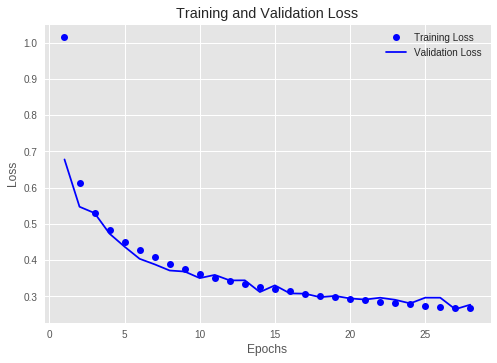

In [15]:
# Training and Validation Loss

epochs = range (1, 29)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

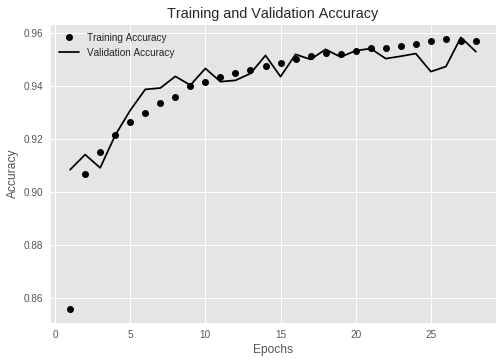

In [16]:
# Training and Validation Accuracy

plt.plot(epochs, acc, 'ko', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Evaluate on Test Data

test_loss, test_acc = model.evaluate(test_data, test_labels)
test_loss, test_acc

10000/10000 [==============================] - 1s 75us/step


(0.2585541484117508, 0.9582)